### TensorFlow Minimal Example of NN With Huber Loss Function
**Hubert Loss** is an alternative of loss for regressions : The Huber loss is more appropriate than the L2-norm when we have outliers, as it is less sensitive to them (in our example we don't have outliers, but you will surely stumble upon a dataset with outliers in the future). The L2-norm loss puts all differences *to the square*, so outliers have a lot of influence on the outcome.  
The proper syntax of the Huber loss is **tf.losses.huber_loss(labels, predictions)**.

### Import relevent Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

### Data generation 

In [2]:
# Data -> Preprocess -> save in .npz
observations = 1000

xs = np.random.uniform(-10 ,10, size = (observations, 1))
zs = np.random.uniform(-10, 10, size = (observations, 1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

# Save data into .npz file (n-dimensional numpy array )

np.savez("TF_intro", inputs=generated_inputs, targets = generated_targets)

### Solving with TensorFlow

In [3]:
# Two variables that measures the size of our inputs and outputs
input_size = 2
output_size = 1

### Outlining the Model 

In [4]:
# Creation of Tensorflow objects : 
# Feed data --> tf.placeholder 
# Vary --> tf.Variables
# dot product-> tf.matmul

# Creations of two placeholders, where we feed the data
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])
# The None means we need not specify the dimension 

# Varibles : Weights and biases
weights = tf.Variable(tf.random_uniform([input_size,output_size], minval=-0.1, maxval= 0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval=-0.1, maxval=0.1))

# Outputs
outputs = tf.matmul(inputs, weights) + biases

Instructions for updating:
Colocations handled automatically by placer.


### Choosing the objective function and optimization method

In [6]:
# Define the objective function 
# tf is our library, we need a module that contain loss function: losses is a module that contains most of the commons Loss functions
huber_loss = tf.losses.huber_loss(labels = targets, predictions = outputs)  

# The optimization method
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(huber_loss)

### Prepare for execution 

In [7]:
sess = tf.InteractiveSession()

### Initializing variables

In [8]:
# tf.global_variables_initializer() is a method that initializes all tensor objects "marked" as variables
initializer = tf.global_variables_initializer()
sess.run(initializer) # Running this line of code initialized the variables

###  Loading training Data

In [9]:
# np.load is a method which loads data from an npz. , .npy, or pickled files into an object 
training_data = np.load("TF_intro.npz")

### Learning 

In [10]:
for e in range(100):
    _,current_loss = sess.run([optimize, huber_loss],
                             feed_dict = {inputs : training_data['inputs'] , targets : training_data['targets']})
    print (current_loss)

17.087458
15.981475
14.888013
13.80972
12.750179
11.715139
10.709087
9.73633
8.795964
7.8905196
7.039891
6.27317
5.616414
5.0930624
4.7094297
4.459262
4.3149443
4.2268357
4.1608076
4.10303
4.0485034
3.9955747
3.9436831
3.8926818
3.8425245
3.7930796
3.7442
3.6958334
3.6478872
3.6002634
3.5529068
3.5057652
3.4587817
3.4119127
3.3651285
3.3184025
3.2717242
3.2250807
3.1784635
3.1318681
3.0852895
3.0387275
2.9921768
2.9456382
2.8991094
2.852591
2.806082
2.7595825
2.7130928
2.6666095
2.6201365
2.5736709
2.5272129
2.4807665
2.434333
2.3879125
2.3415089
2.295119
2.2487476
2.2023973
2.1560707
2.1097684
2.0634892
2.0172346
1.9710047
1.9248012
1.8786231
1.8324741
1.7863556
1.7402712
1.6942217
1.6482124
1.6022449
1.5563248
1.5104707
1.4646959
1.4190048
1.3734092
1.3279258
1.2825686
1.2373706
1.1923686
1.1476055
1.1031642
1.0591557
1.0157783
0.97322243
0.9316501
0.89118654
0.8518962
0.8138323
0.7770393
0.7415825
0.70750743
0.67484653
0.64361596
0.61381537
0.58542377
0.55842406
0.5327978


In [11]:
out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})

### Plotting Data

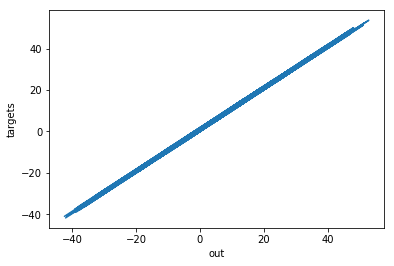

In [12]:
plt.plot(out[0], training_data['targets'])
plt.xlabel('out')
plt.ylabel('targets')
plt.show()

Some takeaways:

Any function that has the property to be lower for better results and higher for worse results can be a loss function. This includes the Huber loss.
Almost everything seems identical.
The values of the loss are generally lower (because of the Huber loss formula, and the convexity of the two functions).
For our problem, both the L2-norm loss and the Huber loss work equally well.
Generally, the Huber loss is used when we have a lot of outliers.